# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.048993e+01     6.231181e+00
 * time: 0.004227876663208008
     1     2.580713e+01     3.954018e+00
 * time: 0.012472867965698242
     2     1.769302e+01     4.477524e+00
 * time: 0.031944990158081055
     3     1.676066e+01     4.972263e+00
 * time: 0.0511929988861084
     4     1.207469e+01     1.688426e+00
 * time: 0.07050299644470215
     5     1.057169e+01     8.356620e-01
 * time: 0.09004998207092285
     6     1.021957e+01     8.460027e-01
 * time: 0.10556292533874512
     7     9.939283e+00     6.169386e-01
 * time: 0.12114691734313965
     8     9.774169e+00     4.356922e-01
 * time: 0.13664603233337402
     9     9.679432e+00     5.255259e-01
 * time: 0.15206193923950195
    10     9.624518e+00     3.883352e-01
 * time: 0.1681530475616455
    11     9.599049e+00     8.368864e-01
 * time: 0.18042707443237305
    12     9.508161e+00     4.923788e-01
 * time: 0.1923830509185791
    13     9.446075e+00     4.819333e-01
 * time:

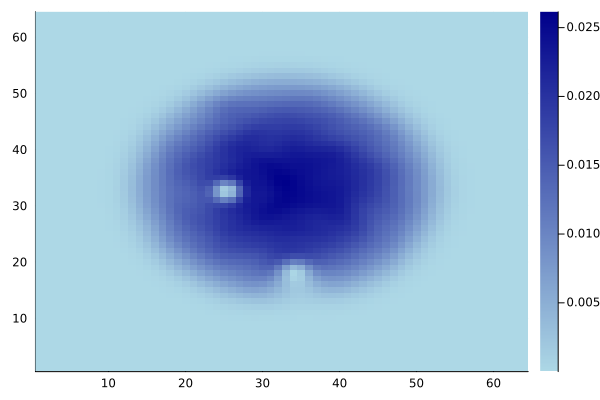

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)